# OpenCV를 활용한 카메라 스티커 앱

## 요  약
***
<span style="font-size:12pt; line-height:1.5;">
    &nbsp; &nbsp; C++기반 이미치 처리 라이브러리 Dlib의 HOG feature을 활용하여 얼굴을 검출하고, 얼굴 검출의 주요 좌표인 렌드마크와 영상 처리에 특화된 OpenCV 라이브러리를 활용하여 스티커를 사용자가 얼굴 내 원하는 좌표에 합성하여 이미지를 가공한다.
</span>

***

In [1]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

## 1. 정면 이미지 얼굴 검출
***
<span style="font-size:12pt; line-height:1.5;">
    &nbsp; &nbsp; 얼굴 검출 알고리즘이 얼굴을 잘 찾을 수 있는 정면의 사진을 활용하여 진행해보았다.
</span>

***

### 1.1 이미지 불러오기 (Load image)

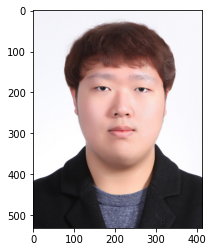

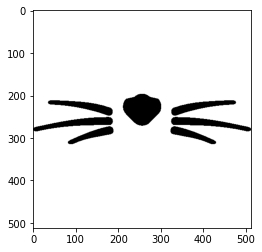

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex3_cat_whiskers/image.png'
cat_image_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex3_cat_whiskers/cat-whiskers.png'

my_img_bgr = cv2.imread(my_image_path)
cat_img_bgr = cv2.imread(cat_image_path)

my_img_rgb = cv2.cvtColor(my_img_bgr, cv2.COLOR_BGR2RGB)
cat_img_rgb = cv2.cvtColor(cat_img_bgr, cv2.COLOR_BGR2RGB)

img_show = my_img_bgr.copy()

plt.imshow(my_img_rgb)
plt.show()
plt.imshow(cat_img_rgb)
plt.show()

### 1.2 얼굴 검출 (Face detection)

In [3]:
face_detector = dlib.get_frontal_face_detector()
dlib_rects = face_detector(my_img_rgb, 1)

***

`class 'dlib.fhog_object_detector'` 의 인자값은 아래와 같다.<p>
* face_detector(얼굴 이미지 파일, 이미지 업샘플링 횟수)
    
***

rectangles[[(118, 139) (304, 325)]]


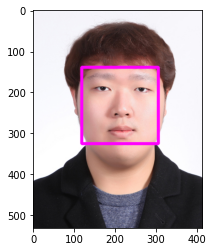

In [4]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (255,0,255), 5, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

***

`cv2.rectangle` 의 인자값은 아래와 같다.

* rectangle(이미지 파일, 시작 좌표(x,y) , 종료 좌표(x,y) , 색상(BGR) , 선 두께, 선 종류, 비트 시프트)

***

### 1.3 얼굴 랜드마크 (Face landmark)

In [5]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:    
    points = landmark_predictor(my_img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

***


+ `dlib_rects` : &nbsp; rectangles[[(118, 139) (304, 325)]]
+ `dlib_rect` : &nbsp; [(118, 139) (304, 325)]
+ `points` : &nbsp; <dlib.full_object_detection object at 0x7fa0b0256d30>
+ `points.parts()` : &nbsp; points[(104, 199), (105, 228), (109, 257), ... , (216, 296), (207, 294)]
+ `list_points` : &nbsp; [(104, 199), (105, 228), (109, 257), ... , (216, 296), (207, 294)]

***

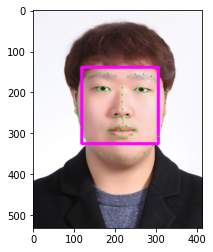

In [6]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 0), -1) # Green

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

***
+ `list_landmarks` : [[(104, 199), (105, 228), (109, 257), ... , (216, 296), (207, 294)]]
+ `landmark` : [(104, 199), (105, 228), (109, 257), ... , (216, 296), (207, 294)]
+ `point` : (104, 199), (105, 228), (109, 257), ... , (216, 296), (207, 294)
***
`cv2.circle` 의 인자값은 아래와 같다.

* circle(이미지 파일, 좌표(x,y) , 색상(BGR) , 선 두께, 선 종류, 비트 시프트)
***

### 1.4 스티커 위치 설정

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0] - 95 # 스티커 위치 x좌표 설정 변수
    y = landmark[30][1] - 90 # 스티커 위치 y좌표 설정 변수
    w = dlib_rect.width()
    h = dlib_rect.width()
    sticker_image = cv2.resize(cat_img_bgr, (w,h))

(217, 241)


In [8]:
sticker_area = my_img_bgr[y:y+sticker_image.shape[0], x:x+sticker_image.shape[1]]

In [9]:
my_img_bgr[y:y+sticker_image.shape[0], x:x+sticker_image.shape[1]] = \
    np.where(sticker_image == 255, sticker_area, sticker_image).astype(np.uint8)

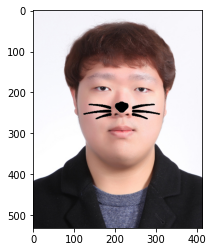

In [10]:
plt.imshow(cv2.cvtColor(my_img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 여러 변수가 있을때 얼굴 인식 여부
***

<span style="font-size:12pt; line-height:1.5;">
    &nbsp; &nbsp; 정면이 아닌 얼굴각도, 이미지 밝기 등 다양한 변수에서도 얼굴을 검출할 수 있는지 실험해보았다.
</span>

***

### 자주 사용하는 코드 함수화

In [11]:
def find_landmark(image_rgb, image_bgr):
    face_detector = dlib.get_frontal_face_detector()
    dlib_rects = face_detector(image_rgb, 1)
    tmep_image = image_bgr.copy()
    
    list_landmarks = []
    
    for dlib_rect in dlib_rects:
        points = landmark_predictor(image_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(tmep_image, point, 2, (0, 255, 0), -1)
    
    img_show_rgb = cv2.cvtColor(tmep_image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()

### 2.1 얼굴에 물체가 있을 때

+ 얼굴에 안경을 착용했을 때, 눈동자와 형태가 비슷한 안경을 구별하고 눈동자를 찾을 수 있는지 실험해보았다.<br>
+ 이를 위해 유느님을 소환해보았다.

#### 2.1.1 이미지 확인

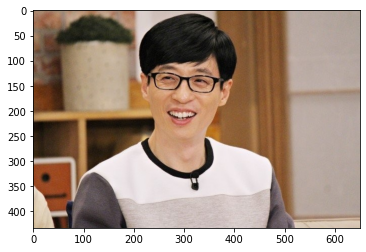

In [12]:
y_image_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex3_cat_whiskers/glass_front.jpg'
y_img_bgr = cv2.imread(y_image_path)
y_img_rgb = cv2.cvtColor(y_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(y_img_rgb)
plt.show()

#### 2.1.2 얼굴 검출 여부 확인

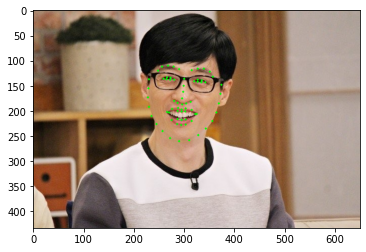

In [13]:
find_landmark(y_img_rgb, y_img_bgr)

***

<span style="font-size:12pt; line-height:1.5;">
    얼굴 검출 분류기가 안경과 눈동자를 혼동하지 않고, 정확하게 눈동자만 식별했음을 확인할 수 있다.
</span>

***

### 2.2 다른 얼굴 각도에 물체가 있을 때

***

<span style="font-size:12pt; line-height:1.5;">
    정면은 얼굴의 턱선 등이 명확하기 때문에 구별을 잘 한게 아닐까 라는 의문이 들어, 얼굴의 선이 정면보다 불명확한 옆면의 사진을 활용해 실
    험해보기로 했다.
</span>

***

#### 2.2.1 이미지 확인

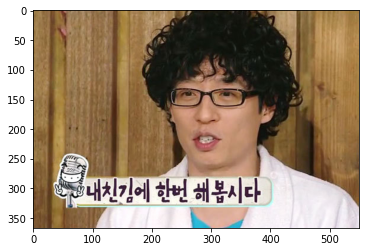

In [14]:
yo_image_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex3_cat_whiskers/pamahead.jpg'
yo_img_bgr = cv2.imread(yo_image_path)
yo_img_rgb = cv2.cvtColor(yo_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(yo_img_rgb)
plt.show()

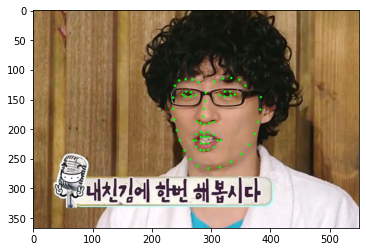

In [15]:
find_landmark(yo_img_rgb, yo_img_bgr)

***

<span style="font-size:12pt; line-height:1.5;">
    옆면의 얼굴 이미지에도 얼굴을 잘 검출했다. 특히, 귀와 얼굴 부분을 깔끔하게 분리하여 검출한것에 놀라웠다.<br>
    또한 파마 가발로 가려진 눈썹또한 잘 검출했다.
</span>

***

### 2.3 얼굴의 명암이 어두울 때

***

<span style="font-size:12pt; line-height:1.5;">
    '유느님은 너무 빛나기에 분류기가 한눈에 바로 검출한게 아닐까?' 라는 의문이 들어, 어두운 얼굴의 이미지로 실험해보기로 했다.
    <br>얼굴의 명암이 어두운 다크히어로 마동석 형님을 소환했다.
</span>

***

#### 2.3.1 이미지 확인

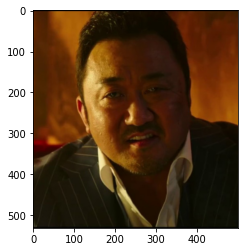

In [16]:
madong_image_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex3_cat_whiskers/dark_madong.jpg'
madong_img_bgr = cv2.imread(madong_image_path)
madong_img_rgb = cv2.cvtColor(madong_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(madong_img_rgb)
plt.show()

#### 2.3.2 얼굴 검출 여부 확인

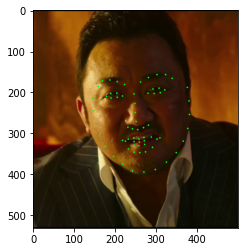

In [17]:
find_landmark(madong_img_rgb, madong_img_bgr)

***

<span style="font-size:12pt; line-height:1.5;">
    어둠속에서도 마동석 형님의 존재감을 놓치지 않고 얼굴을 잘 검출했음을 확인할 수 있다<br>
    그러나 어두운 명암에서는 랜드마크와 일부 얼굴 부위 위치에 오차가 있음을 확인할 수 있다.<br>
    때문에, 얼굴 검출 알고리듬을 사용할 때는 이미지를 가급적 밝게 전처리 하는 과정의 필요성을 느꼈다.
</span>

***

### 2.4 만화 얼굴도 검출할 수 있을까

***

<span style="font-size:12pt; line-height:1.5;">
    Dlib의 얼굴 검출 알고리듬이 얼굴의 특징으로 검출함을 알았고, 검출 성능이 매우 뛰어남을 알았다.<br>
    그렇다면 실제 배우를 기반으로 만화로 만든 이미지도 검출 할 수 있을지 궁금하여 실험해보았다.
</span>

***

#### 2.4.1 이미지 확인

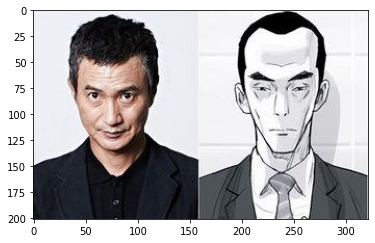

In [18]:
cartoon2_image_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex3_cat_whiskers/cartoon2.jpg'
cartoon2_img_bgr = cv2.imread(cartoon2_image_path)
cartoon2_img_rgb = cv2.cvtColor(cartoon2_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(cartoon2_img_rgb)
plt.show()

#### 2.4.2 얼굴 검출 여부 확인

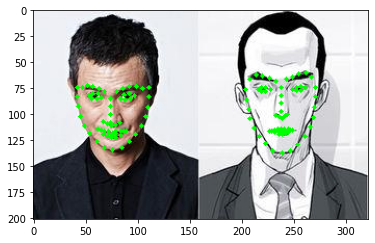

In [19]:
find_landmark(cartoon2_img_rgb, cartoon2_img_bgr)

***

<span style="font-size:12pt; line-height:1.5;">
    만화로 그려진 얼굴도 얼굴 특징에 맞게 잘 검출했음을 확인할 수 있었다.
</span>

***

### 2.5 석고 얼굴도 검출할 수 있을까

***

<span style="font-size:12pt; line-height:1.5;">
    실제 얼굴 이미지가 아닌 얼굴도 검출한다면, 석고로 만든 얼굴도 검출할 수 있을까?<br>
    일부러 어두운 명암의 석고 인형으로 실험을 해보았다.
</span>

***

#### 2.5.1 이미지 확인

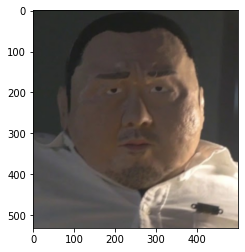

In [20]:
cartoon_image_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex3_cat_whiskers/cartoon.jpg'
cartoon_img_bgr = cv2.imread(cartoon_image_path)
cartoon_img_rgb = cv2.cvtColor(cartoon_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(cartoon_img_rgb)
plt.show()

#### 2.5.2 얼굴 검출 여부 확인

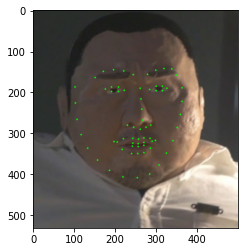

In [21]:
find_landmark(cartoon_img_rgb, cartoon_img_bgr)

***

<span style="font-size:12pt; line-height:1.5;">
    석고 인형의 얼굴도 잘 검출했음을 확인할 수 있다.
    <br> 그러나, 2.3의 어두운 명암의 이미지와 같은 문제점을 공유한다.
    <br> 어두운 명암에서는 랜드마크와 일부 얼굴 부위 위치에 오차가 있다는것을 다시 한번 확인하였다.
    <br> 때문에 랜드마크를 기준으로 스티커를 합성하는 스티커 앱은 얼굴 이미지를 밝게 전처리 해주는것이 좋다는 결론을 얻었다.  
</span>

***